# <center> Inteligencia Artificial </center>
## <center> Parcial Tercer Corte</center>
### <center>Nov 2020. </center>
### <center>ECEI - Universidad Sergio Arboleda </center>
### <center> Miguel Ángel Ruiz Torres, Manuel Leonardo Salgado Olmos </center>
### <center> Estudiantes de Ingeniería electrónica </center>
### <center> miguelan.ruiz@correo.usa.edu.co </center>
### <center> manuel.salgado@correo.usa.edu.co </center>

1) Importar las bibliotecas para tenerlas disponibles en el entorno

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Separa según porcentaje, grupo de entrenamiento
from sklearn.model_selection import train_test_split
# El modelo de regresión lineal
from sklearn.linear_model import LinearRegression
# Las métricas para evaluar nuestro modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sweetviz as sv
from sklearn.model_selection import learning_curve, ShuffleSplit
#def plot_curvas_aprendizaje(estimador, titulo, x, y, y_lim=None, )
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

# Es una biblioteca que genera visualizaciones de alta densidad lo que permiten
# un analisis de datos exploratorios a partir de estas visualizaciones en html.
!pip install sweetviz


####2) Determinar la variable "target"
#####- Para la selección de la variable u objeto target tuvimos en cuenta un criterio sencillo: de las caracteristicas disponibles cual tenía mayor relación con las demás y de cual se queria poder predecir su comportamiento. En este caso **CreditScore** cumple nuestro proposito, pues el puntaje que cierto usuario tenga en su DB esta directamente relacionado con su Balance, Salario Estimado, Número de Productos, Tarjeta de Crédito e incluso, con la permanencia como cliente en el Banco.

#### 3|4) Selecciona las "features", determinar tipo y justificar.
#####El criterio de selección de las "features" depende completamente de su utilidad para el ejercicio. Si bien, los datos como número de fila, id y apellidos son caracteristicas claves de una base de datos, pero seleccionarlo no me aporta nada al objetivo del ejercicio. Las siguientes caracteristicas seleccionadas son aquellas que se consideran con más relación entre ellas.

#####- **Geography**: Es una variable **categórica** debido a que es discreta y cuenta con 3 clasificaciones, (France, Spain, Germany). Describe la nacionalidad del cliente del Banco y el tipo de variable de lectura es un Object -> String. 

#####- **Gender**: Es una variable **categórica** debido a que es discreta y tiene 2 tipos o categorías, (Male, Female). Determina el género del cliente del banco. El tipo de variable de lectura es un Object -> String.

#####- **Age**: Es una varible de **regresión** debido a que es continua. Esta determina la edad del cliente y el tipo de variable de lectura es un int64 -> int.

#####- **Tenure**: Es un tipo de variable continua, quiere decir que es **regresión**, va a ser considerado como el tiempo en el que un usuario ha mantenido continuamente la posesión de una cuenta bancaria. Por tanto sera tomado como el valor superior del periodo en años, el tipo de variable de lectura es un int64 -> int.

#####- **Balance**: Esta caracteristica es una variable de tipo continua, quiere decir que es **regresión**, el balance es el monto total manejado durante toda su permanencia como cliente del Banco. El tipo de variable de lectura es un float64 -> float.

#####- **NumOfProducts**: Determina el número de productos adquiridos por el cliente del Banco durante su permanencia. Es una variable de tipo continua, quiere decir que es de **regresión** y su tipo en lectura es un int64 -> int.

#####- **HasCrCard**: Esta caracteristica se refiere a que si actualmemte cuenta o no con una tarjeta de crédito, siendo {1} o un alto para sí, y {0} o un bajo para no. Con base en lo anterior, esta caracteristica es una variable discreta, es decir, una de **regresión**, ademas es de tipo int64 -> int.

#####- **IsActiveMember**: Esta, como la anterior, son representaciones en números de una variable categórica, donde se usa una consepción binaria para determinar un sí o un no. En este caso, se usa para saber si es un miembro activo del Banco o no. El tipo de variables es de **regresión**, su tipo variable de lectura es de int64 -> int.

#####- **EstimatedSalary**: Esta caracteristica es acerca del salaraio estimado que recibe el cliente del banco al año. Es de tipo continuo, lo que indica que es una variable de **regresión**, en la lectura es una variable de float64 -> float.

#####- **Exited**: Por último, esta caracteristica representa si una persona que se encuentra en la DB del Banco es cliente o no, quiere decir que si esta persona ha salido o no de la adquisión de servicios por medio del Banco. El tipo de variable es **categórica** y un int64 -> int.

####Para continuar con el desarrollo debemos leer y almacenar los datos de csv en un objeto con ayuda y manejo de pandas. 
#####Este dataset es sobre información recolectada de un Banco y cuenta con multiples caracteristicas de sus clientes. Por ejemplo: Id de Usuario, Apellido, Puntaje de crédito, Geografía, entre otros. El objetivo de este ejercicio es tomar esta información y aplicarle una regresión lineal multivariable para diferentes umbrales y una estructura seleccionada, compuesta por un objeto "target" y algunas de las caracteristicas iniciales. Estos, anteriormente seleccionados.

In [ ]:
dataFrame = pd.read_csv('Modelo-01c.csv')
dataFrame.head(10)
#dataFrame.columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# .unique() retorna los valores unicos de una objeto dado.
dataFrame.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
## Situación que puede suceder en los ficheros ".csv"
# Es que existan datos perdidos o desaparacidos "missing values"
# Es necesario manipular estos datos (borrar, reemplazar: promedio, entre otras
nan_df = dataFrame[dataFrame.isna().any(axis=1)] 
nan_df.count() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Como se puede observar dentro del DataFrame cargado no hay ninguna perdida de informacion o datos nulos, y por el contrario hasta las variables categoricas poseen sus datos bien relacionados de acuerdo a las caracteristicas.

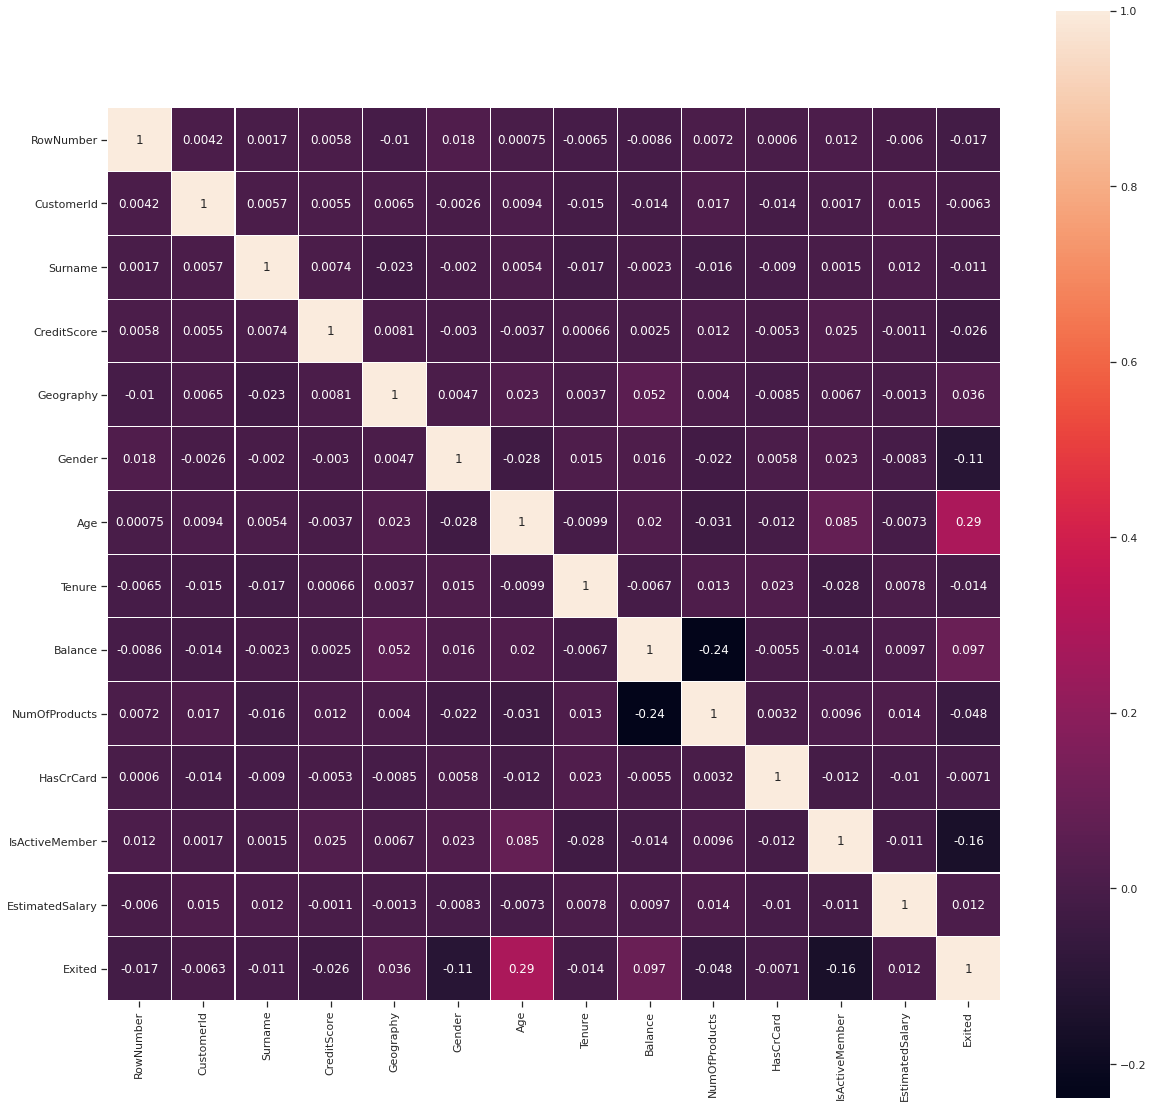

In [ ]:
dfAUX_encoded = dataFrame.copy() # Hacemos un backup
for label in dfAUX_encoded.columns:
  dfAUX_encoded[label] = LabelEncoder().fit_transform(dfAUX_encoded[label])

sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(20, 20))
sns.heatmap(dfAUX_encoded.corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

Al realizar una revision convencional del mapa de calor, respecto de la correlacion entre las distintas variables contenidas en el DataFrame(DF). Se puede deducir que no existen relaciones significativas fuera de *Gender, Age* y *Exited.* Es decir que no son lo suficientemente fuertes, al ubicarse por debalo del 10% de validacion, para poder afirmar que existe una dependencia.

Text(0.5, 0.95, 'Numero de personas por Region')

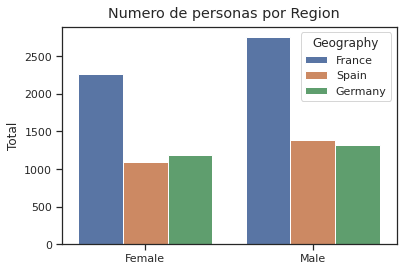

In [ ]:
fig = plt.figure()
ax = sns.countplot(x='Gender', 
                   hue='Geography', 
                   data=dataFrame)
ax.set(xlabel='', ylabel='Total')
fig.suptitle("Numero de personas por Region", y=0.95)

A partir de graficos de barras se pretende identificar la ocurrencia de determinados parametros al interior del DF, que permitan conocer la manera en la que se pueden construir nuevas relaciones de acuerdo a las necesidades de la prediccion. Dado que si los datos que se implementan, no poseen de forma significativa una estrechez en su comportamiento, es posible que se requiera una mayor cantidad de datos de entrenamiento y aun no se logre concluir con un modelo que se ajuste correctamente.



Text(0.5, 0.9, 'Promedio de CreditScore por edad')

<Figure size 2000x1375 with 0 Axes>

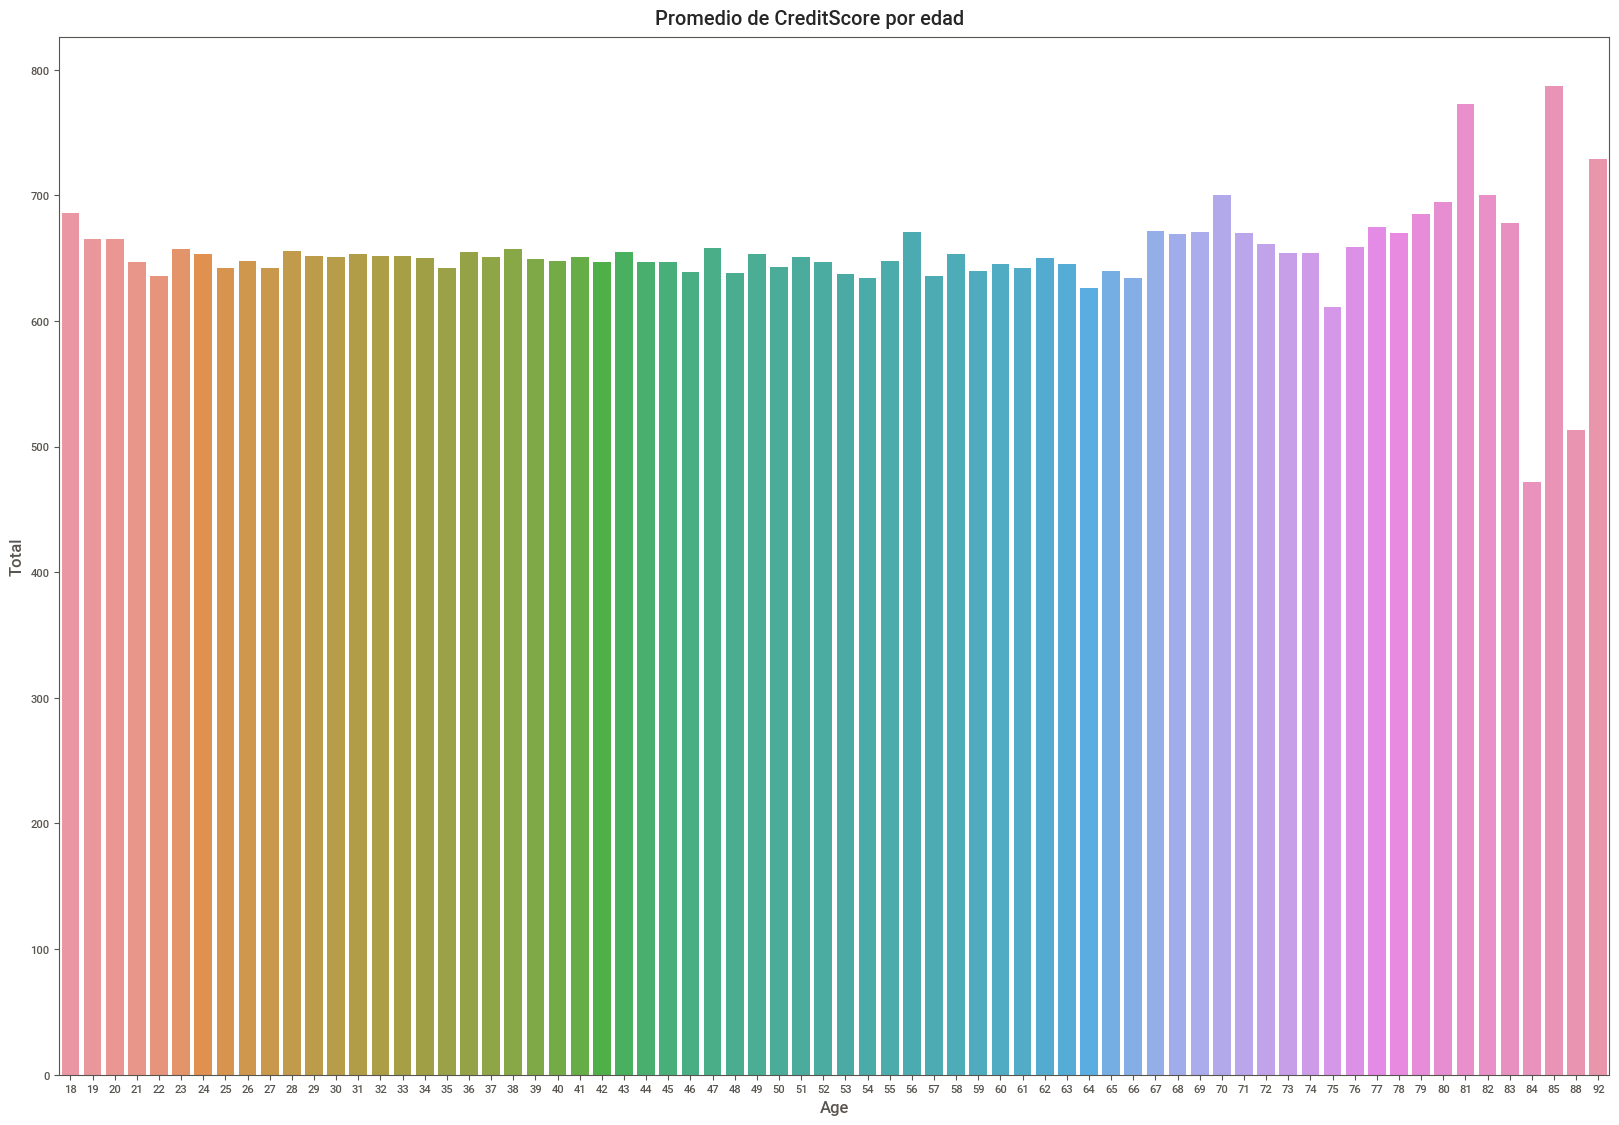

In [ ]:
fig = plt.figure(figsize=(20, 5.5/8*20))
dataSet = {
    'Age': dataFrame.groupby('Age').mean().index, 
    'CreditScore': dataFrame.groupby('Age').mean()['CreditScore']
}
dfSet = pd.DataFrame(dataSet)
dfSet['CreditScore'] = dfSet['CreditScore'].astype(np.int64)
fig = plt.figure(figsize=(20, 5.5/8*20))
ax = sns.barplot(x=dfSet.Age,y=dfSet.CreditScore) 
ax.set(xlabel='Age', ylabel='Total')
fig.suptitle("Promedio de CreditScore por edad", y=0.9)

Tratando de establecer o identificar algun modelo de comportamiento respecto de la Edad y el puntaje de Credito obtenido por los consumidores, no parece ser una caracteristica discriminatoria. Por lo que igualmente se tendra en cuenta para el entrenamiento, dado que si se compara el CreditScore en relacion al balance, se puede establecer que si existe una relacion fuerte. Por tanto de esta manera se puede construir una relacion indirecta con la edad de acuerdo a los balances anuales de cuenta.

In [ ]:
dataFrame[ dataFrame['Age'] == dataFrame['Age'].nunique() ]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
559,560,15571816,Ritchie,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
678,679,15810978,Pugliesi,788,Spain,Female,70,1,0.00,2,1,1,41610.62,0
969,970,15605926,Sinclair,649,Germany,Male,70,9,116854.71,2,0,1,107125.79,0
1866,1867,15632575,Moore,559,France,Female,70,9,0.00,1,1,1,122996.76,0
2094,2095,15813022,Kapustina,531,Spain,Male,70,1,0.00,2,0,0,99503.19,0
2717,2718,15648702,Yuriev,775,Germany,Male,70,6,119684.88,2,1,1,74532.02,0
3646,3647,15610900,Thompson,770,France,Female,70,9,110738.89,1,1,0,22666.77,1
3910,3911,15698716,Baker,620,France,Female,70,3,87926.24,2,1,0,33350.26,1
4463,4464,15778975,Nnonso,850,Germany,Female,70,1,96947.58,3,1,0,62282.99,1
4849,4850,15660301,Dellucci,491,Germany,Male,70,6,148745.92,2,1,1,17818.33,0


In [ ]:
dataFrame.groupby('Age').mean().index

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            88, 92],
           dtype='int64', name='Age')

In [ ]:
dfDummy = pd.get_dummies(dataFrame['Geography']) 
dfDummy.head() 

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
dfAUX = dataFrame.merge(dfDummy, left_index=True, right_index=True) 
del dfAUX['Geography']
dfAUX.head() 

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


En el DF se ubican multiples caracteristicas, que en este caso no aportan ni positiva o negativamente al analisis de los datos, por lo que se procede a ejecutar su eliminacion en un DataFrame auxiliar de trabajo para no corromper los datos originales.

In [ ]:
dfAUX.drop(['RowNumber','CustomerId','Surname','Gender'], axis=1,inplace=True)
dfAUX.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [ ]:
dfAUX.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
France,10000.0,0.501400,0.500023,0.00,0.00,1.000,1.0000,1.00


A partir de ahora y una vez planificados los siguientes pasos a desarrollar, se continuara con la creacion de caracteristicas adicionales en el DF que corresponderan a relaciones construidas luego de realizar una ingenieria a los datos. Es decir que lo que se pretende es evidenciar que en los resultados, se lograra tener una dependencia directa entre las caracteristicas de entrada, de acuerdo al aumento de la efectividad en la prediccion que se busca lograr.

Por tanto que las relaciones construidas haran referencia a los puntajes crediticios de cada uno de los usuarios y esto constara de las siguientes asociaciones:

*   La relacion compuesta por la edad.
*   El comportamiento de los usuarios mas antiguos de acuerdo a su puntaje.
*   El puntaje obtenido, que pueda ser un resultado indirecto del balance de la cuenta.
*   La probabilidad de que el puntaje este determinado a incrementarse de acuerdo al numero de productos del portafolio bancario en posecion.
*   La prevalencia de dinero en la cuenta, de acuerdo a la estimacion de salario del usuario.

Para ello en algunos casos es necesario implementar una normalizacion de los datos para lograr visualizarlos de manera adecuada mientras se validan que los resultados sean correctos, posteriormente pasaran a ser usados por la biblioteca grafica en HTML de SWEETVIZ para la generacion del reporte.

In [ ]:
dfAUX['RatioSalary'] = dfAUX.Balance/(dfAUX.EstimatedSalary)
df_score_by_age = dfAUX.CreditScore*(dfAUX.Age-dfAUX.Age.min())/(dfAUX.Age.max()-dfAUX.Age.min())
dfAUX['ScoreByAge'] = df_score_by_age
dfAUX['TenureByAge'] = dfAUX.Tenure/(dfAUX.Age)
dfAUX['ScoreByBalance'] = dfAUX.CreditScore/dfAUX.Balance
dfAUX['ScoreByNumProducts'] = dfAUX.CreditScore/(dfAUX.NumOfProducts)

dfAUX['France'] = dfAUX['France'].astype(np.int8)
dfAUX['Germany'] = dfAUX['Germany'].astype(np.int8)
dfAUX['Spain'] = dfAUX['France'].astype(np.int8)

dfAUX['ScoreByBalance'].replace(to_replace=math.inf,inplace=True,value=0)
dfAUX['France'].replace(to_replace=0,inplace=True,value=-1)
dfAUX['Germany'].replace(to_replace=0,inplace=True,value=-1)
dfAUX['Spain'].replace(to_replace=0,inplace=True,value=-1)
dfAUX.CreditScore[0]
dfAUX.Age[0]
dfAUX.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,RatioSalary,ScoreByAge,TenureByAge,ScoreByBalance,ScoreByNumProducts
0,619,42,2,0.00,1,1,1,101348.88,1,1,-1,1,0.000000,200.756757,0.047619,0.000000,619.000000
1,608,41,1,83807.86,1,0,1,112542.58,0,-1,-1,-1,0.744677,188.972973,0.024390,0.007255,608.000000
2,502,42,8,159660.80,3,1,0,113931.57,1,1,-1,1,1.401375,162.810811,0.190476,0.003144,167.333333
3,699,39,1,0.00,2,0,0,93826.63,0,1,-1,1,0.000000,198.364865,0.025641,0.000000,349.500000
4,850,43,2,125510.82,1,1,1,79084.10,0,-1,-1,-1,1.587055,287.162162,0.046512,0.006772,850.000000
5,645,44,8,113755.78,2,1,0,149756.71,1,-1,-1,-1,0.759604,226.621622,0.181818,0.005670,322.500000
6,822,50,7,0.00,2,1,1,10062.80,0,1,-1,1,0.000000,355.459459,0.140000,0.000000,411.000000
7,376,29,4,115046.74,4,1,0,119346.88,1,-1,1,-1,0.963969,55.891892,0.137931,0.003268,94.000000
8,501,44,4,142051.07,2,0,1,74940.50,0,1,-1,1,1.895518,176.027027,0.090909,0.003527,250.500000
9,684,27,2,134603.88,1,1,1,71725.73,0,1,-1,1,1.876647,83.189189,0.074074,0.005082,684.000000


In [ ]:
continuous_vars = ['Balance', 'EstimatedSalary','RatioSalary','ScoreByAge','TenureByAge','ScoreByBalance','ScoreByNumProducts']
minVec = dfAUX[continuous_vars].min().copy()
maxVec = dfAUX[continuous_vars].max().copy()
dfAUX[continuous_vars] = (dfAUX[continuous_vars]-minVec)/(maxVec-minVec)
dfAUX.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,RatioSalary,ScoreByAge,TenureByAge,ScoreByBalance,ScoreByNumProducts
0,619,42,2,0.000000,1,1,1,0.506735,1,1,-1,1,0.000000,0.266609,0.085714,0.000000,0.694444
1,608,41,1,0.334031,1,0,1,0.562709,0,-1,-1,-1,0.000070,0.250960,0.043902,0.036309,0.679894
2,502,42,8,0.636357,3,1,0,0.569654,1,1,-1,1,0.000132,0.216216,0.342857,0.015736,0.097002
3,699,39,1,0.000000,2,0,0,0.469120,0,1,-1,1,0.000000,0.263433,0.046154,0.000000,0.337963
4,850,43,2,0.500246,1,1,1,0.395400,0,-1,-1,-1,0.000150,0.381357,0.083721,0.033895,1.000000


Como se puede observar y en relacion al contexto de los nombres de las variables, para este dataset proveniente de un banco en algun instante de tiempo. Tenemos distintas variables categoricas como lo son la geografia, ser miembro activo, tener tarjeta de credito, el genero y haberse retirado. Adicional de las construidas de acuerdo a la posicion geografica del usuario, creando consigo las nuevas caracteristicas de *France, Germany* y *Spain.*

In [ ]:
my_report = sv.analyze(dfAUX)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


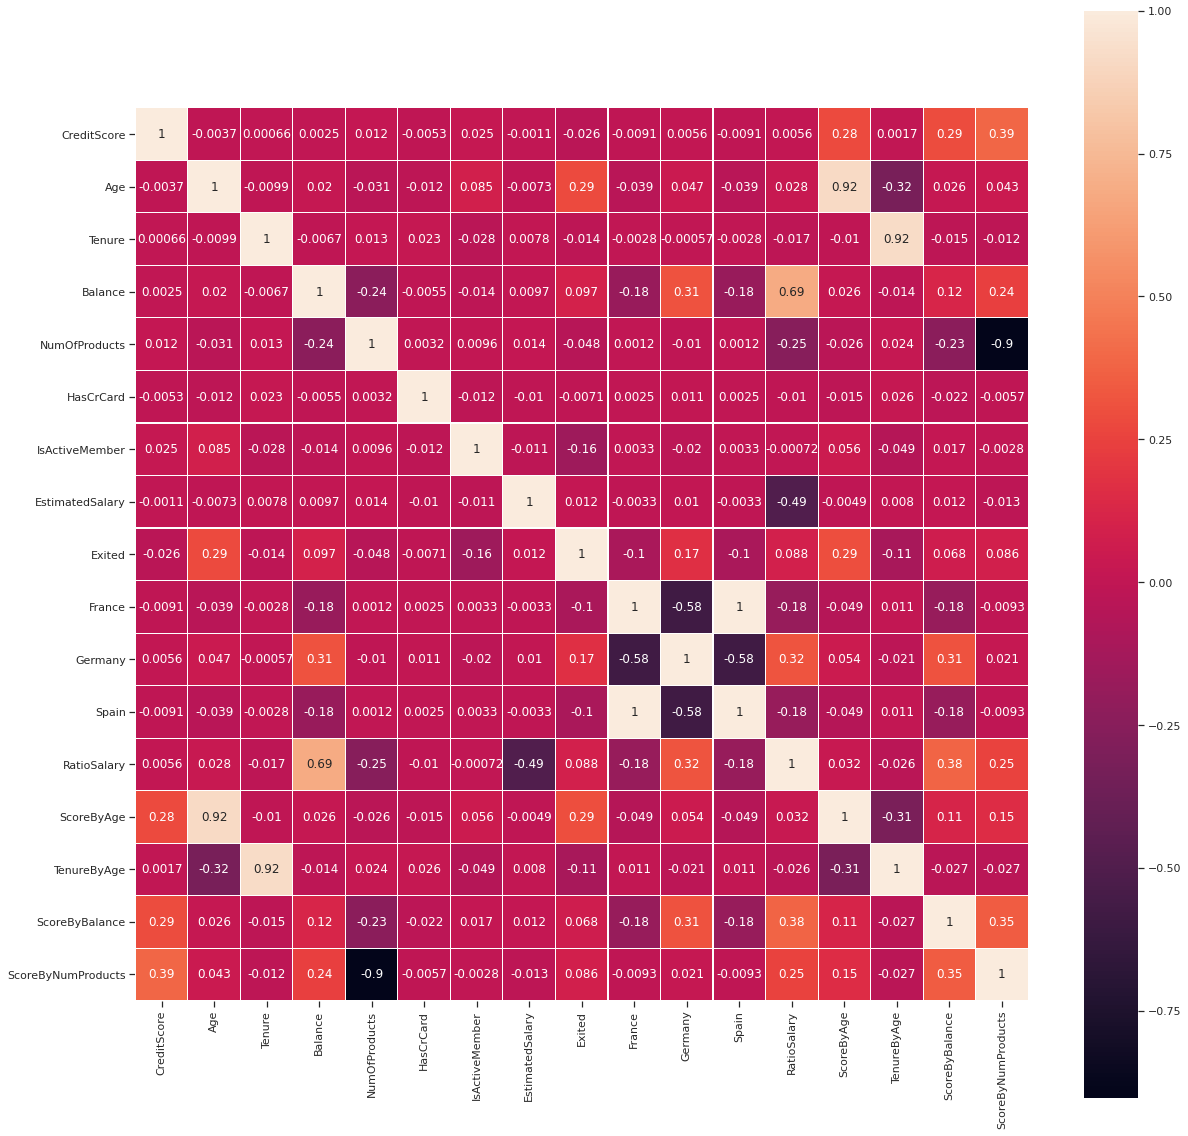

In [ ]:
dfAUX_encoded = dfAUX.copy() # Hacemos un backup
for label in dfAUX_encoded.columns:
  dfAUX_encoded[label] = LabelEncoder().fit_transform(dfAUX_encoded[label])

sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(20, 20))
sns.heatmap(dfAUX_encoded.corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

Posteriormente al preprocesado de los datos, anterior al entrenamiento. Ahora si es posible visualizar dependencias desde el 17% hasta el 69%, en el mapa de calor correspondiente al DF dfAUX, que es el implementado y manipulado en todo el desarrollo de la actividad.

De esta manera se busca que la asociacion entre caracteristicas construya comportamientos verdaderamente significativos que ayuden a mejorar el proceso de entrenamiento.

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, 
                       cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
        
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, 
                       cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    return plt
    
def relacionFeatures(corrMatrix, umbral): 
  feature = []
  valores = [] 
  for i, index in enumerate(corrMatrix.index): 
    if abs(corrMatrix[index]) > umbral: 
           feature.append(index) 
           valores.append(corrMatrix[index])
  df = pd.DataFrame(data = valores, index = feature, columns=['Valor de Correlacion'])
  return df 
  
def umbralize(df,umbral,target):
  y_test,y_predic,dataCorrelacion = generatePrediction(df,umbral,target)
  data = { 
    'Actual': y_test, 
    'Predicted': y_predic 
  } 
  #metrics(dataCorrelacion.drop(target,axis=1),umbral,y_test,y_predic)
  dfPredicted = pd.DataFrame(data) 
  dfPredicted.head(10) 
  return metrics(dataCorrelacion.drop(target,axis=1),umbral,y_test,y_predic)

def showPrediction(df,umbral,target):
  y_test,y_predic,dataCorrelacion = generatePrediction(df,umbral,target)
  data = { 
    'Actual': y_test, 
    'Predicted': y_predic 
  } 
  #metrics(dataCorrelacion.drop(target,axis=1),umbral,y_test,y_predic)
  dfPredicted = pd.DataFrame(data) 
  return dfPredicted

def metrics(features, umbrall, y_test, y_predic):
  puntuacion = r2_score(y_test,y_predic)
  mae =  mean_absolute_error(y_test,y_predic)
  mse =  mean_squared_error(y_test,y_predic)

  total_features.append(len(features.columns))
  total_nombre_features.append(features.columns.tolist())
  valor_corr_sel.append(umbrall)
  r2_valores.append(puntuacion)
  mae_valores.append(mae)
  mse_valores.append(mse)

  df_metricas = pd.DataFrame(data = [total_nombre_features,total_features,
                                     valor_corr_sel,r2_valores,
                                     mse_valores, mae_valores], index = ['NameFeatures',
                                                                         '# Features',
                                                                         'ValorCorrelacion',
                                                                         'Puntuacion',
                                                                         'MSE',
                                                                         'MAE'])
  return df_metricas

def generatePrediction(df,umbral,target):
  matrixCorrelacion = df.corr() 
  valorCorrelacion = relacionFeatures(matrixCorrelacion[target], umbral) 
  dataCorrelacion = df[valorCorrelacion.index] 
  X = dataCorrelacion.drop(target, axis=1)
  y = dataCorrelacion[target] 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0) 
  modelo = LinearRegression() 
  modelo.fit(X_train, y_train) 
  y_predict_train = modelo.predict(X_train) 
  y_predic = modelo.predict(X_test) 
  return y_test, y_predic, dataCorrelacion

def plotLearningCurve(df, umbral,target):
  matrixCorrelacion = df.corr() 
  valorCorrelacion = relacionFeatures(matrixCorrelacion[target], umbral) 
  dataCorrelacion = df[valorCorrelacion.index] 
  X = dataCorrelacion.drop(target, axis=1)
  y = dataCorrelacion[target] 
  titulo = "Curvas de aprendizaje (Regresion Lineal) "+str(X.columns.values)
  cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
  estimador = LinearRegression()
  plot_learning_curve(estimador, titulo, X, y, cv = cv, n_jobs=1)
  plt.show()

In [ ]:
dfAUX.corr()
relacionFeatures(dfAUX.corr()['CreditScore'],0.2)

,Valor de Correlacion
CreditScore,1.000000
ScoreByAge,0.278151
ScoreByNumProducts,0.382499


In [ ]:
total_features = []
total_nombre_features = []
valor_corr_sel = []
r2_valores = []
mse_valores = []
mae_valores = []





Lo que se busca mediante la curva de aprendizaje, es poder visualizar mediante el modelo de entrenamiento escogido, el comportamiento a futuro de la capacidad de aprendizaje que puede llegar a lograr el modelo para adaptarse de forma satisfactoria, de acuerdo al numero de datos de prueba.

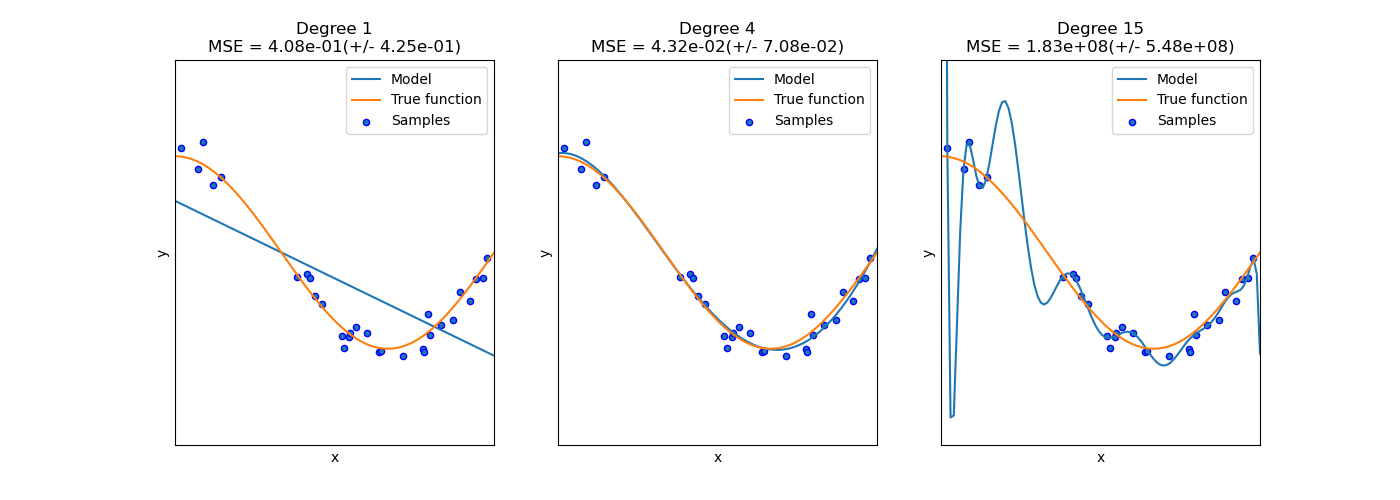


De esta manera y de acuerdo a las puntuaciones obtenidas, poder determinar el *Accuracy* del modelo construido, de acuerdo a los resultados de sus clasificadores.

#### 9) Seleccionar al menos 3 umbrales diferentes con sus apreciaciones.

In [ ]:
umbrales = [0.001,0.01,0.22]

total_features = []
total_nombre_features = []
valor_corr_sel = []
r2_valores = []
mse_valores = []
mae_valores = []

umbralize(dfAUX,umbrales[0],'CreditScore').T
umbralize(dfAUX,umbrales[1],'CreditScore').T
umbralize(dfAUX,umbrales[2],'CreditScore').T

,NameFeatures,# Features,ValorCorrelacion,Puntuacion,MSE,MAE
0,"[Age, Balance, NumOfProducts, HasCrCard, IsAct...",15,0.001,0.859425,1320.74,25.6497
1,"[NumOfProducts, IsActiveMember, Exited, ScoreB...",6,0.01,0.714406,2683.23,35.1711
2,"[ScoreByAge, ScoreByNumProducts]",2,0.22,0.164348,7851.17,71.1767


#####A) Umbral 0.001

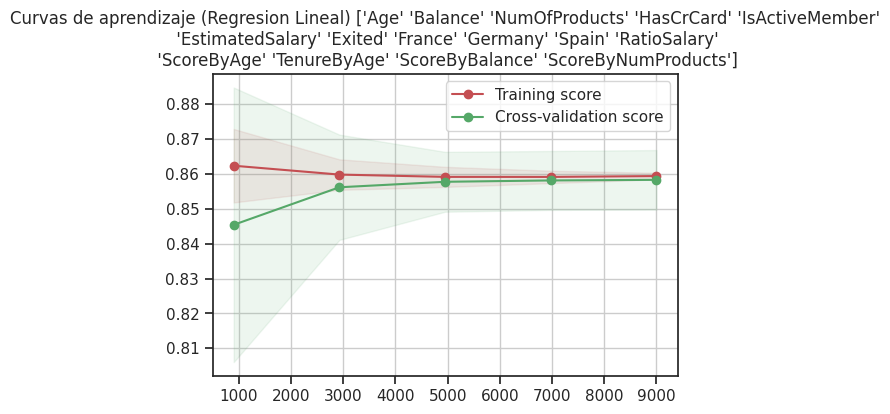

In [ ]:
plotLearningCurve(dfAUX,valor_corr_sel[0],'CreditScore')

#####B) Umbral 0.01


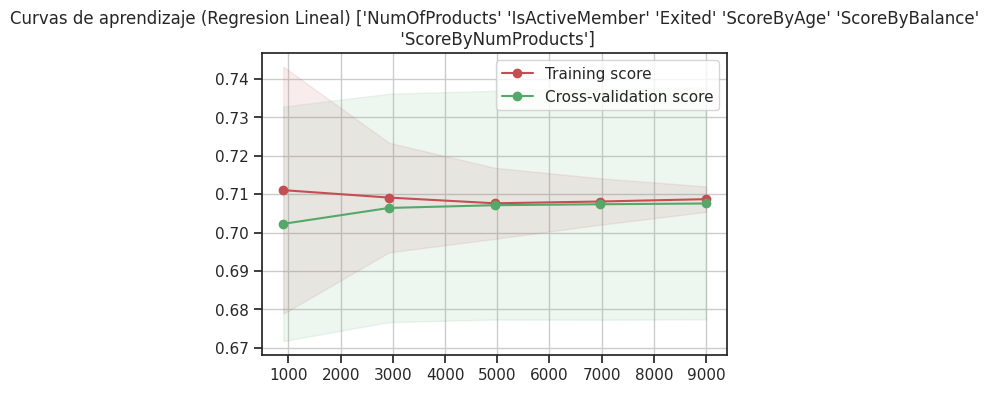

In [ ]:
plotLearningCurve(dfAUX,valor_corr_sel[1],'CreditScore')

#####C) Umbral 0.22


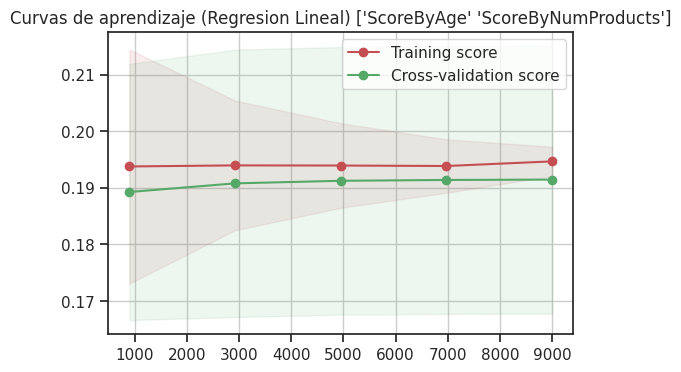

In [ ]:
plotLearningCurve(dfAUX,valor_corr_sel[2],'CreditScore')

Dado que es necesario poner en evidencia las mejoras respecto del modelo inicial del DF que no poseia valores de correlacion en las caracteristicas significativos, se agregan nuevamente umbrales adaptados a la capacidad de los valores originales para realizar una comparativa entre el ajuste y niveles de error mejorados.

In [ ]:
umbralize(dataFrame,0.0200,'CreditScore').T
umbralize(dataFrame,0.0010,'CreditScore').T
umbralize(dataFrame,0.0005,'CreditScore').T

,NameFeatures,# Features,ValorCorrelacion,Puntuacion,MSE,MAE
0,"[Age, Balance, NumOfProducts, HasCrCard, IsAct...",15,0.001,0.859425,1320.74,25.6497
1,"[NumOfProducts, IsActiveMember, Exited, ScoreB...",6,0.01,0.714406,2683.23,35.1711
2,"[ScoreByAge, ScoreByNumProducts]",2,0.22,0.164348,7851.17,71.1767
3,"[IsActiveMember, Exited]",2,0.02,0.00257338,9371.08,78.672
4,"[RowNumber, CustomerId, Age, Balance, NumOfPro...",9,0.001,0.00368617,9360.63,78.6732
5,"[RowNumber, CustomerId, Age, Tenure, Balance, ...",10,0.0005,0.00370392,9360.46,78.673


###Conclusiones

*   En la curva de aprendizaje, es posible tener distintos comportamientos que hacen referencia a la escalabilidad y potencial rendimiento del modelo. Razon por la cual siempre se espera que en los mejores resultados, permita que la curva de entrenamiento se eleve mayormente sobre la validacion cruzada para conseguir unos resultados lo suficientemente satisfactorios para pasar a la etapa de implementacion.
*   Como se pudo observar a traves de la construccion realizada en la ingenieria de datos, superficialmente se logro realizar un mejor ajuste a la prediccion de los datos para pasar de un 0.36% a un 85.94% con el mismo valor umbral en la Multicolinealidad de las caracteristicas que fueron aceptadas. Ademas, de adicionalmente reducir el error cuadratico en un 85.89%. 
*   Para obtener mejores resultados en el modelo, y una curva de aprendizaje que permita mediante un mayor numero de datos en el entrenamiento, conseguir una prediccion satisfactoria que no interfiera negativamente con las caracteristicas en la Multicolinealidad. Es necesario realizar un analisis mas profundo de los datos y las relaciones  existentes, para intentar identificar o aprovechar el mayor numero de dependencias, que son las que permitiran al modelo crear regiones de decision bien caracterizadas y poder asi cumplir adecuadamente con la clasificacion.
*   El numero de caracteristicas puede influir tanto positiva, como negativamente. Esto debido a que el modelo de entrenamiento no tiene como realizar una clasificacion adecuada a partir de solo datos cruzados. Por ello es necesario identificar cuales son los datos de entrada y lo que iran en la etapa de procesado independientemente de su normalizacion.



